In [60]:
import quandl as ql

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

sensex = ql.get('BSE/SENSEX', start_date = '2010-1-1', end_date = '2022-1-1', api_key=config['quandl']['api_key'])

sensex.to_csv('../data/sensex.csv')

#tcs
tcs = ql.get('BSE/BOM532540', start_date = '2010-1-1', end_date = '2022-1-1', api_key=config['quandl']['api_key'])

tcs.to_csv('../data/tcs.csv')

In [61]:
msft = pd.read_csv('../data/MSFT.csv', index_col='Date', parse_dates=['Date'])
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623899,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631533,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486509,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242256,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402544,51197400
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.133545,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.367981,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.944031,17457100


In [62]:
msft_transformed = msft[['Adj Close', 'Volume']]

In [63]:
msft_transformed.describe()

,Adj Close,Volume
count,3272.000000,3.272000e+03
mean,95.091443,3.801156e+07
std,89.052666,2.147184e+07
min,17.725107,7.425600e+06
25%,25.903890,2.384465e+07
50%,49.963953,3.227825e+07
75%,134.384521,4.679112e+07
max,339.075562,3.193179e+08


In [64]:
msft_transformed = msft_transformed.rename(columns={"Adj Close" : "price", "Volume" : "volume"})
msft_transformed

,price,volume
Date,,
2010-01-04,23.623899,38409100
2010-01-05,23.631533,49749600
2010-01-06,23.486509,58182400
2010-01-07,23.242256,50559700
2010-01-08,23.402544,51197400
...,...,...
2022-12-23,238.133545,21207000
2022-12-27,236.367981,16688600
2022-12-28,233.944031,17457100


In [65]:
msft_transformed['return'] = np.log(msft_transformed['price']/msft_transformed['price'].shift(1))
msft_transformed.head()

,price,volume,return
Date,,,
2010-01-04,23.623899,38409100,NaN
2010-01-05,23.631533,49749600,0.000323
2010-01-06,23.486509,58182400,-0.006156
2010-01-07,23.242256,50559700,-0.010454
2010-01-08,23.402544,51197400,0.006873


In [66]:
msft_transformed.dropna(inplace = True)
msft_transformed.head()

,price,volume,return
Date,,,
2010-01-05,23.631533,49749600,0.000323
2010-01-06,23.486509,58182400,-0.006156
2010-01-07,23.242256,50559700,-0.010454
2010-01-08,23.402544,51197400,0.006873
2010-01-11,23.104864,68754700,-0.012802


In [67]:
lags = 7

In [68]:
cols = []
for lag in range(1, lags + 1):
    returns = 'r_lag_{}'.format(lag)
    volume = 'v_lag_{}'.format(lag)
    msft_transformed[returns] = msft_transformed['return'].shift(lag)
    msft_transformed[volume] = msft_transformed['volume'].shift(lag)
    cols.append(returns)
    cols.append(volume)

In [69]:
msft_transformed.dropna(inplace = True)
msft_transformed

,price,volume,return,r_lag_1,v_lag_1,r_lag_2,v_lag_2,r_lag_3,v_lag_3,r_lag_4,v_lag_4,r_lag_5,v_lag_5,r_lag_6,v_lag_6,r_lag_7,v_lag_7
Date,,,,,,,,,,,,,,,,,
2010-01-14,23.631533,63228100,0.019899,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0,-0.006156,58182400.0,0.000323,49749600.0
2010-01-15,23.555202,79913200,-0.003235,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0,-0.006156,58182400.0
2010-01-19,23.738392,46575700,0.007747,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0
2010-01-20,23.349113,54849500,-0.016535,0.007747,46575700.0,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0
2010-01-21,22.906403,73086700,-0.019143,-0.016535,54849500.0,0.007747,46575700.0,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.133545,21207000,0.002265,-0.025860,28651700.0,0.010818,23690600.0,0.005599,25150800.0,-0.017480,29696400.0,-0.017501,86102000.0,-0.032439,35560400.0,0.001167,35410900.0
2022-12-27,236.367981,16688600,-0.007442,0.002265,21207000.0,-0.025860,28651700.0,0.010818,23690600.0,0.005599,25150800.0,-0.017480,29696400.0,-0.017501,86102000.0,-0.032439,35560400.0
2022-12-28,233.944031,17457100,-0.010308,-0.007442,16688600.0,0.002265,21207000.0,-0.025860,28651700.0,0.010818,23690600.0,0.005599,25150800.0,-0.017480,29696400.0,-0.017501,86102000.0


In [70]:
msft_transformed['direction'] = np.sign(msft_transformed['return'])
msft_transformed.head()

,price,volume,return,r_lag_1,v_lag_1,r_lag_2,v_lag_2,r_lag_3,v_lag_3,r_lag_4,v_lag_4,r_lag_5,v_lag_5,r_lag_6,v_lag_6,r_lag_7,v_lag_7,direction
Date,,,,,,,,,,,,,,,,,,
2010-01-14,23.631533,63228100,0.019899,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0,-0.006156,58182400.0,0.000323,49749600.0,1.0
2010-01-15,23.555202,79913200,-0.003235,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0,-0.006156,58182400.0,-1.0
2010-01-19,23.738392,46575700,0.007747,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-0.010454,50559700.0,1.0
2010-01-20,23.349113,54849500,-0.016535,0.007747,46575700.0,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,0.006873,51197400.0,-1.0
2010-01-21,22.906403,73086700,-0.019143,-0.016535,54849500.0,0.007747,46575700.0,-0.003235,79913200.0,0.019899,63228100.0,0.009269,51863500.0,-0.006629,65912100.0,-0.012802,68754700.0,-1.0


In [71]:
cols

['r_lag_1',
 'v_lag_1',
 'r_lag_2',
 'v_lag_2',
 'r_lag_3',
 'v_lag_3',
 'r_lag_4',
 'v_lag_4',
 'r_lag_5',
 'v_lag_5',
 'r_lag_6',
 'v_lag_6',
 'r_lag_7',
 'v_lag_7']

In [72]:
#msft_transformed['direction'] = msft_transformed['direction'].apply(lambda x: 1 if x == 1.0 else 0)
#msft_transformed

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = msft_transformed[cols]
y = msft_transformed['direction']

In [75]:
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=.5, shuffle=False)

In [76]:
X_train.shape

(1632, 14)

In [77]:
X_test.shape

(1632, 14)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
from sklearn.pipeline import make_pipeline

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [82]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
from sklearn.model_selection import TimeSeriesSplit

In [85]:
tsplit = TimeSeriesSplit(n_splits=100, max_train_size=90,test_size=1, gap=7)

In [86]:

#for fold, (train_idx, val_idx) in enumerate(tsplit.split(X_train)):
 #   print(fold, train_idx, val_idx)

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(lr_model, X_train, y_train, cv=tsplit, scoring='accuracy')


In [89]:
np.average(scores)

0.58

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
print(lr_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])


In [92]:
param_grid = { 'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100], 
              'logisticregression__solver': ['liblinear', 'saga'], 
              'logisticregression__penalty' : ['l1', 'l2']}

In [93]:
grid_search = GridSearchCV(lr_model, param_grid= param_grid, scoring='accuracy', cv=tsplit)

In [94]:
grid_search.fit(X_train, y_train)

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anacon

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anacon

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anacon

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashishk/anacon

GridSearchCV(cv=TimeSeriesSplit(gap=7, max_train_size=90, n_splits=100, test_size=1),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [95]:
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [96]:
grid_search.best_score_

0.59

In [97]:
best_model = grid_search.best_estimator_

In [98]:
y_pred = best_model.predict(X_test)

In [99]:
X_test.shape

(1632, 14)

In [100]:
y_test.shape

(1632,)

In [101]:
y_pred.shape

(1632,)

In [102]:
accuracy_score(y_test, y_pred)

0.5116421568627451

In [103]:
test_returns = pd.DataFrame(msft_transformed.loc[X_test.index]['return'])
test_returns

,return
Date,
2016-07-11,0.005530
2016-07-12,0.011720
2016-07-13,0.005622
2016-07-14,0.004289
2016-07-15,-0.000745
...,...
2022-12-23,0.002265
2022-12-27,-0.007442
2022-12-28,-0.010308


In [104]:
test_returns['prediction'] = y_pred

In [105]:
hits = (y_pred == y_test).value_counts() #correct hits
hits

True     835
False    797
Name: direction, dtype: int64

In [106]:
test_returns

,return,prediction
Date,,
2016-07-11,0.005530,-1.0
2016-07-12,0.011720,1.0
2016-07-13,0.005622,1.0
2016-07-14,0.004289,-1.0
2016-07-15,-0.000745,-1.0
...,...,...
2022-12-23,0.002265,1.0
2022-12-27,-0.007442,1.0
2022-12-28,-0.010308,1.0


In [107]:
test_returns['strat'] = test_returns['prediction'] * test_returns['return']

In [108]:
test_returns[['return', 'strat']].sum().apply(np.exp)

return    5.042864
strat     1.741909
dtype: float64

<Axes: xlabel='Date'>

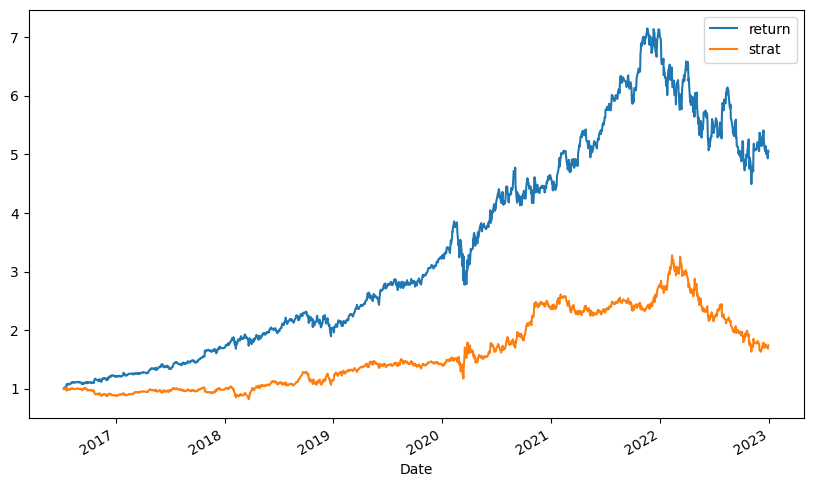

In [109]:
test_returns[['return', 'strat']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [110]:
test_returns['direction'] = np.sign(test_returns['return'])

In [111]:
predictions = msft.join(test_returns).dropna()

In [117]:
predictions

,Open,High,Low,Close,Adj Close,Volume,return,prediction,strat,direction
Date,,,,,,,,,,
2016-07-11,52.500000,52.830002,52.470001,52.590000,47.700535,22269200,0.005530,-1.0,-0.005530,1.0
2016-07-12,52.939999,53.400002,52.790001,53.209999,48.262878,27317600,0.011720,1.0,0.011720,1.0
2016-07-13,53.560001,53.860001,53.180000,53.509998,48.534981,25356800,0.005622,1.0,0.005622,1.0
2016-07-14,53.840000,53.990002,53.580002,53.740002,48.743610,24545500,0.004289,-1.0,-0.004289,1.0
2016-07-15,53.950001,54.000000,53.209999,53.700001,48.707325,32024400,-0.000745,-1.0,0.000745,-1.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.133545,21207000,0.002265,1.0,0.002265,1.0
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.367981,16688600,-0.007442,1.0,-0.007442,-1.0
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.944031,17457100,-0.010308,1.0,-0.010308,-1.0


In [113]:
with pd.HDFStore('data.h5') as f:
    f.put('models/logistic_reg/test_result', predictions)

In [59]:
predictions.to_hdf('data.h5', 'models/logisitc_reg/test_result')

In [578]:
tscv =TimeSeriesSplit(n_splits=100, max_train_size=90,test_size=7, gap=7)

In [579]:
scores = cross_val_score(lr_model, X_test, y_test, cv=tscv, scoring='accuracy')
scores

array([0.57142857, 0.71428571, 0.57142857, 0.28571429, 0.71428571,
       0.57142857, 0.57142857, 0.71428571, 0.57142857, 0.42857143,
       0.71428571, 0.57142857, 0.57142857, 0.57142857, 0.71428571,
       0.57142857, 0.57142857, 0.28571429, 0.42857143, 0.85714286,
       0.42857143, 0.71428571, 0.57142857, 0.28571429, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.85714286,
       0.85714286, 0.28571429, 0.57142857, 0.57142857, 0.71428571,
       0.14285714, 0.85714286, 0.57142857, 0.14285714, 0.42857143,
       0.28571429, 0.57142857, 0.57142857, 0.57142857, 0.        ,
       0.14285714, 0.57142857, 0.57142857, 0.42857143, 0.57142857,
       0.42857143, 0.71428571, 0.42857143, 0.85714286, 0.85714286,
       0.28571429, 0.57142857, 0.57142857, 0.85714286, 0.        ,
       0.42857143, 0.85714286, 0.14285714, 0.42857143, 0.71428571,
       0.71428571, 0.57142857, 0.28571429, 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.57142857, 0.57142857, 0.42857

In [580]:
np.average(scores)

0.5171428571428571